# Bank Marketing : Client subscription prediction

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Dataset: 

'https://archive.ics.uci.edu/static/public/222/bank+marketing.zip'  

We will use bank-full.csv for this prediction.

**Bank client data**:  
   1. age (numeric)  
   2. - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")   
   3. - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4. - education (categorical: "unknown","secondary","primary","tertiary")  
   5. - default: has credit in default? (binary: "yes","no")  
   6. - balance: average yearly balance, in euros (numeric)   
   7. - housing: has housing loan? (binary: "yes","no")  
   8. - loan: has personal loan? (binary: "yes","no")  
   **related with the last contact of the current campaign:**  
   9. - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10. - day: last contact day of the month (numeric)
  11. - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12. - duration: last contact duration, in seconds (numeric)  
   **other attributes**:  
  13. - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14. - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15. - previous: number of contacts performed before this campaign and for this client (numeric)  
  16. - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  **Output variable (desired target)**:  
  17. - y - has the client subscribed a term deposit? (binary: "yes","no")

    ** [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.**

In [2]:
df = pd.read_csv('bank-full.csv', delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [4]:
# We use below features 
features = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 
            'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

df =  df[features]
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


**Look at the data** 

In [5]:
df.head().T

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5
month,may,may,may,may,may
duration,261,151,76,92,198


Missing Values

In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
numerical = list(set(df.columns) - set(categorical))
categorical.remove('y')

In [8]:
# replace the values yes/no with 1/0
df['y'] = (df['y'] == 'yes').astype(int)

## Split the data

In [9]:
from sklearn.model_selection import train_test_split
#  splitting train/val/test sets with 60%/20%/20% distribution
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [10]:
len(df_train), len(df_val), len(df_test)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train['y']
y_val = df_val['y']
y_test = df_test['y']

del df_train['y']
del df_val['y']
del df_test['y']

### Question 1: ROC AUC  for feature importance

In [11]:
from sklearn.metrics import roc_auc_score
feat_importance_scores = []

for feat in numerical:
    score = roc_auc_score(y_train, df_train[feat])
    feat_importance_scores.append(score)

df_feat_importance = pd.DataFrame(feat_importance_scores, index=numerical, columns=['feature_importance'])
df_feat_importance.sort_values(by='feature_importance', ascending=False)

,feature_importance
duration,0.814700
previous,0.598565
pdays,0.590128
balance,0.588831
age,0.487814
day,0.474042
campaign,0.428546


### Question 2: Training the model and AUC score for Logistic regression

1. Train a logistic regression model

In [12]:
from sklearn.linear_model import LogisticRegression

One hot encoding for categorical features


In [13]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

auc = roc_auc_score(y_val, y_pred ).round(3)

print(f'The roc auc score  is {auc}')

The roc auc score  is 0.656


### Question 3: Precision and Recall

In [14]:
thresholds = np.arange(0.01, 1.0, 0.01)

evaluation_array = []

for t in thresholds:
    y_pred = model.predict_proba(X_val)[:, 1]
    y_pred_0_or_1 = (y_pred >=t) 

    auc = roc_auc_score(y_val, y_pred_0_or_1)
    
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (actual_positive & predict_positive).sum()
    fp = (actual_negative & predict_positive).sum()

    fn = (actual_positive & predict_negative).sum()
    tn = (actual_negative & predict_negative).sum()

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    evaluation_array.append([t, auc, precision, recall])

evaluation_df = pd.DataFrame(evaluation_array, columns=['threshold', 'auc', 'precision', 'recall'])
evaluation_df

,threshold,auc,precision,recall
0,0.01,0.560364,0.135901,0.996357
1,0.02,0.634682,0.159306,0.995446
2,0.03,0.696323,0.186470,0.989071
3,0.04,0.748094,0.220227,0.971767
4,0.05,0.782575,0.253887,0.951730
...,...,...,...,...
94,0.95,0.516564,0.672414,0.035519
95,0.96,0.513502,0.653061,0.029144
96,0.97,0.510440,0.625000,0.022769
97,0.98,0.509389,0.687500,0.020036


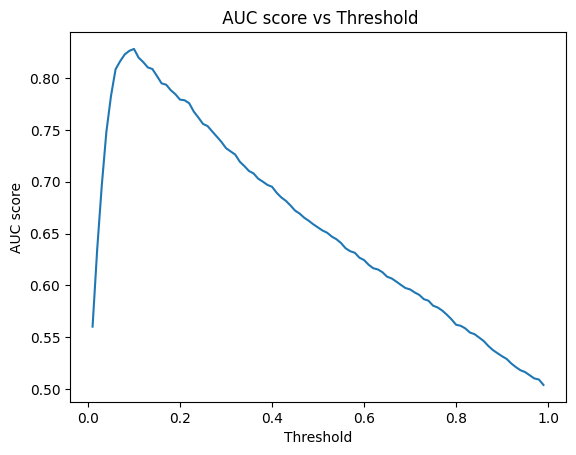

In [15]:
plt.plot(evaluation_df['threshold'], evaluation_df['auc'])
plt.xlabel('Threshold')
plt.ylabel('AUC score')
plt.title(' AUC score vs Threshold')
plt.show()

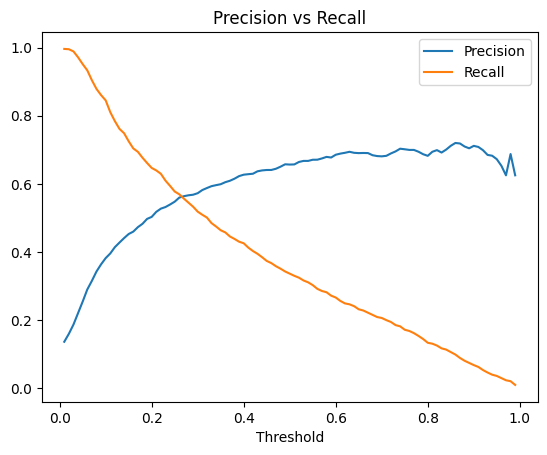

In [16]:
plt.plot( evaluation_df['threshold'], evaluation_df['precision'], label='Precision')
plt.plot(evaluation_df['threshold'], evaluation_df['recall'], label='Recall')
plt.xlabel('Threshold')
plt.title('Precision vs Recall')
plt.legend()
plt.show()

We see the precision and recall intersect for threshold in between 0.2 - 0.3

### Question 4: F1 score

In [17]:
evaluation_array = []

for t in thresholds:
    y_pred = model.predict_proba(X_val)[:, 1]
    y_pred_0_or_1 = (y_pred >=t) 

    auc = roc_auc_score(y_val, y_pred_0_or_1)
    
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (actual_positive & predict_positive).sum()
    fp = (actual_negative & predict_positive).sum()

    fn = (actual_positive & predict_negative).sum()
    tn = (actual_negative & predict_negative).sum()

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    f1_score = 2 * (precision * recall) / (precision + recall)

    evaluation_array.append([t, auc, precision, recall, f1_score])


evaluation_df = pd.DataFrame(evaluation_array, columns=['threshold', 'auc', 'precision', 'recall', 'f1_score'])

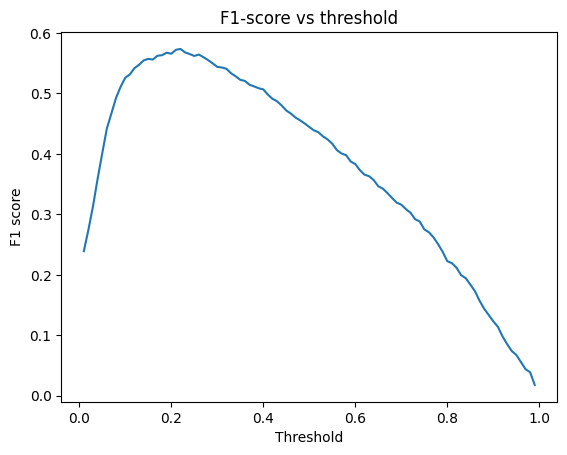

In [18]:
plt.plot( evaluation_df['threshold'], evaluation_df['f1_score'], label='F1-score')
plt.xlabel('Threshold')
plt.ylabel('F1 score')
plt.title('F1-score vs threshold')
plt.show()

In [19]:
print(evaluation_df[evaluation_df['f1_score'] == evaluation_df['f1_score'].max()]['threshold'].item())
evaluation_df[evaluation_df['f1_score'] == evaluation_df['f1_score'].max()]

0.22


,threshold,auc,precision,recall,f1_score
21,0.22,0.77564,0.527079,0.629326,0.573682


We got that F1-score is maximum for threshold 0.22 and we will use it for further analysis.

## Question 5: 5-Fold CV

Now we use thershold = 0.22 for our further analysis.
we define our model and train it on full_train dataframe and evaluate on k-fold validation sets



In [20]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    y_pred_0_or_1 = (y_pred >=0.22) 

    return y_pred_0_or_1



In [21]:
from sklearn.model_selection import KFold

kfold =  KFold(n_splits=5, shuffle=True, random_state=1)

auc_scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train_k = df_full_train.iloc[train_idx]
    y_train_k = df_train_k['y']

    df_val_k = df_full_train.iloc[val_idx]
    y_val_k = df_val_k['y']

    dv, model = train(df_train_k, y_train_k)
    y_pred = predict(df_val_k, dv, model)
    auc_k = roc_auc_score(y_val_k, y_pred)
    auc_scores.append(auc_k)

print(f'The standard devidation of auc score of k fold is {np.std(auc_scores): 0.4f}')

The standard devidation of auc score of k fold is  0.0067


## Question 6: Hyperparameter Tuning for regularisation variable C in Logistic regression 

In [22]:
from sklearn.model_selection import KFold
from sklearn.feature_extraction import DictVectorizer

C = [0.000001, 0.001, 1]

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for c in C:
    
    auc_scores = []

    for train_idx, val_idx in kfold.split(df_full_train):

        df_train_k = df_full_train.iloc[train_idx]
        df_val_k = df_full_train.iloc[val_idx]

        dv = DictVectorizer(sparse=False)

        dicts = df_train_k[categorical + numerical].to_dict(orient='records')

        X_train_k = dv.fit_transform(dicts)
        y_train_k = df_train_k['y']

        dicts_val = df_val_k[categorical + numerical].to_dict(orient='records')
        X_val_k = dv.transform(dicts_val)
        y_val_k = df_val_k['y']

        model = LogisticRegression(solver='liblinear', C=c, max_iter=10000)
        model.fit(X_train_k, y_train_k)
        
        y_pred = model.predict_proba(X_val_k)[:, 1]
        y_pred_0_or_1 = (y_pred >=0.22) 
        auc_k = roc_auc_score(y_val_k, y_pred_0_or_1)
        auc_scores.append(auc_k)

    print(f'The mean and std of auc score of regularisation hyperparameter {c} are {np.mean(auc_scores): .3f} and {np.std(auc_scores): .3f}')
        






The mean and std of auc score of regularisation hyperparameter 1e-06 are  0.673 and  0.008
The mean and std of auc score of regularisation hyperparameter 0.001 are  0.739 and  0.012
The mean and std of auc score of regularisation hyperparameter 1 are  0.783 and  0.007


We see above that for C = 1, the mean auc score is maximum.